In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('car data Regularization.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

#### fuel type has 3 variant petrol , CNG, Diesel

In [6]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

#### 2 seller type has identified here Dealer and Individual

In [7]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

#### 2 Tramission are identified here Manual and Automatic

In [8]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

#### there 3 owner are there in this data 0 stands for First owner and 1 stands for 2nd owner and 3 stand for more then 2 owners

In [9]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [11]:
numerical_col = df.select_dtypes(include=np.number).columns
categorical_col = df.select_dtypes(include=['object','category']).columns

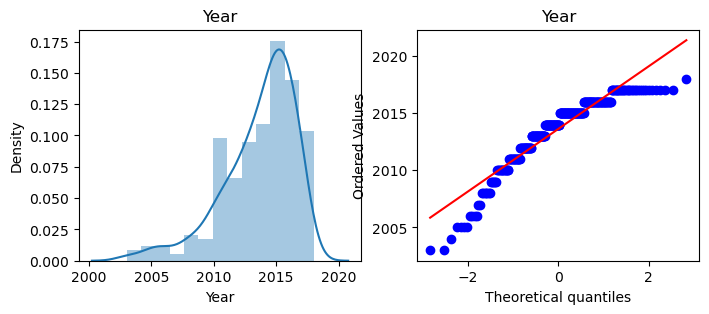

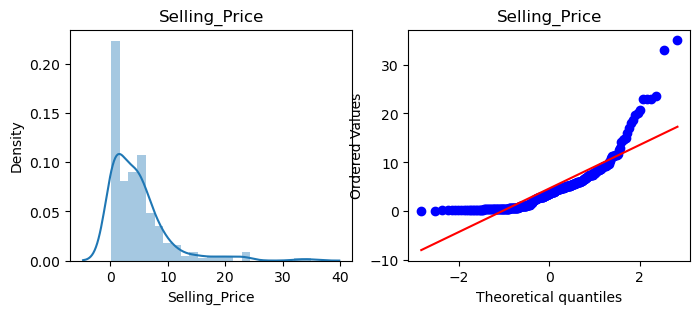

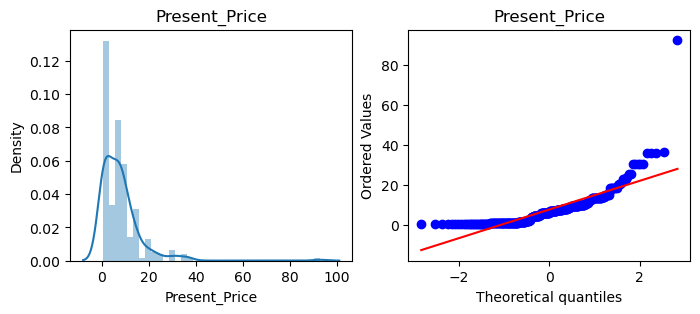

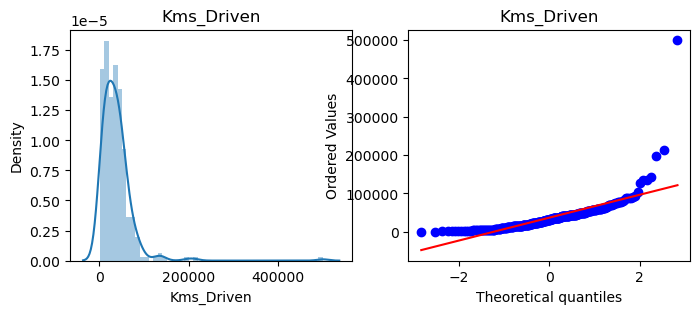

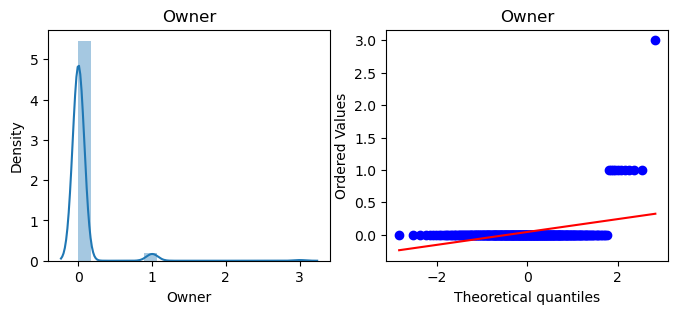

In [12]:
import warnings
warnings.filterwarnings('ignore')
for col in numerical_col:
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    sns.distplot(df[col])
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(df[col],dist='norm',plot=plt)
    plt.title(col)

#### from looking at distribution and QQ plot that is not normally distributes
#### so we have to scale down the data make it a normal distribution

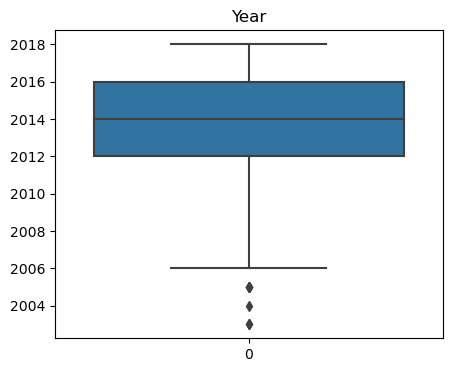

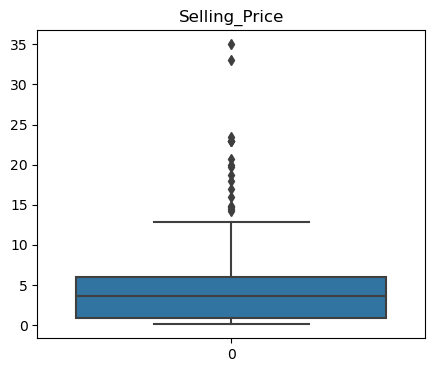

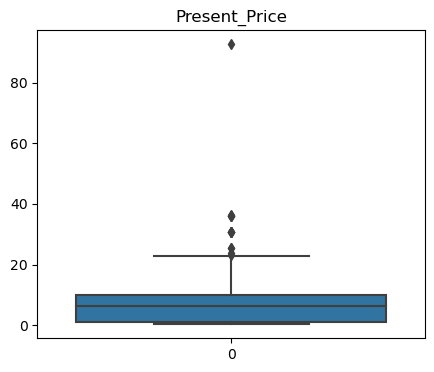

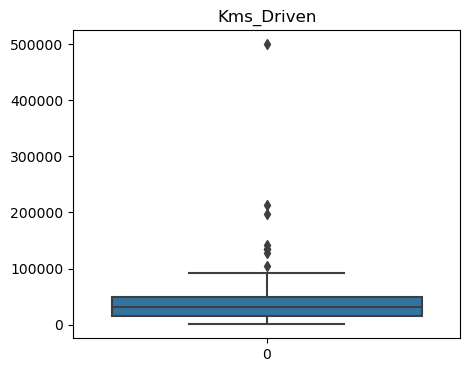

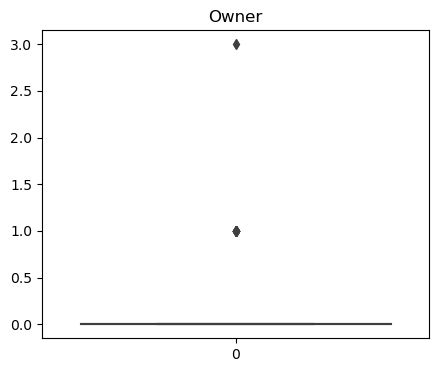

In [13]:
for col in numerical_col:
    plt.figure(figsize=(5,4))
    sns.boxplot(df[col])
    plt.title(col)

#### by looking at the box plot we can clearly say that in this data there are outliers so we try to remove them

### Removing the outliers using capping and iqr method so this way we will not loose our Data and keep
### By using this technique it will maintain the shape of our data


In [14]:
#removing outliers
# Assuming numerical_col contains the list of numerical column names
for col in numerical_col:
    if col != 'Owner':  # Exclude the 'Owner' column from outlier treatment
        percentile75 = df[col].quantile(0.75)
        percentile25 = df[col].quantile(0.25)
        IQR = percentile75 - percentile25

        multiplier = 1.5

        upper_limit = percentile75 + 1.5 * IQR
        lower_limit = percentile25 - 1.5 * IQR

        df[col] = np.where(df[col] > upper_limit, upper_limit,
                           np.where(df[col] < lower_limit, lower_limit, df[col]))


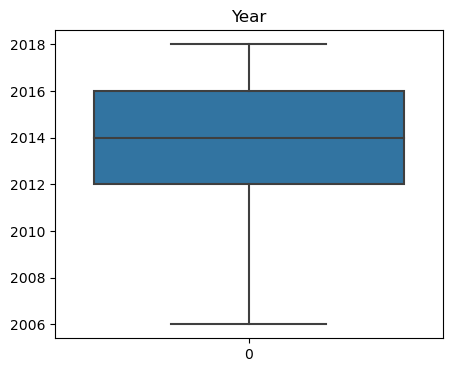

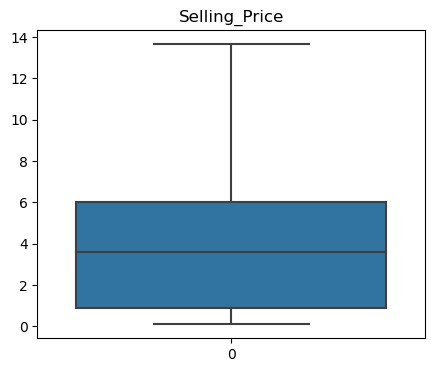

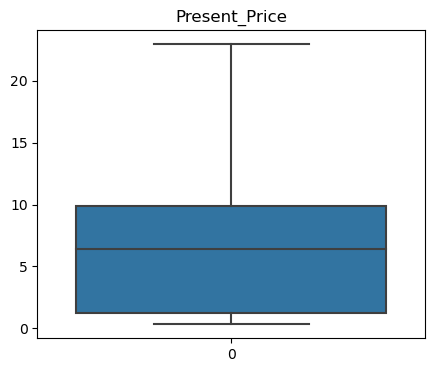

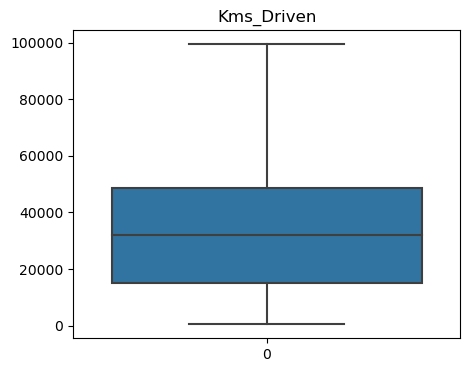

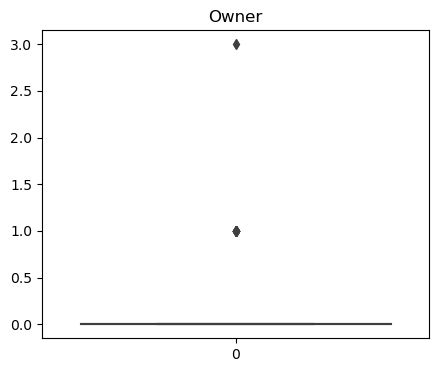

In [15]:
#Again checking for outliers
for col in numerical_col:
    plt.figure(figsize=(5,4))
    sns.boxplot(df[col])
    plt.title(col)

#### As we can see we have removed all the outliers from the data

In [16]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [17]:
X['Owner'].value_counts()

Owner
0    290
1     10
3      1
Name: count, dtype: int64

In [18]:
#train test split the data
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=42)

In [19]:
# As we have already checked that data is not normally distributed so we try to make it
# using function Transformer and Power transformer we cannot use poer transformer as data consist od -ve and 0 values
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
from sklearn.model_selection import cross_val_score

ft = FunctionTransformer(np.log1p)
X_train_ft = ft.fit_transform(X_train[['Year','Present_Price','Kms_Driven']])
X_test_ft = ft.transform(X_test[['Year','Present_Price','Kms_Driven']])


In [22]:
X_test_ft.head(2)

,Year,Present_Price,Kms_Driven
177,7.609367,0.451076,10.085851
289,7.609367,2.681022,9.303922


In [23]:
X_train.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
185,2008.0,0.58,1900.0,Petrol,Individual,Automatic,0
72,2013.0,18.61,56001.0,Petrol,Dealer,Manual,0


In [25]:
X_train_new = X_train.drop(['Year','Present_Price','Kms_Driven'],axis=1)

In [31]:
X_test_new = X_test.drop(['Year','Present_Price','Kms_Driven'],axis=1)

In [26]:
X_train_new.shape

(210, 4)

In [35]:
X_train_new.head(2)

,Fuel_Type,Seller_Type,Transmission,Owner
185,Petrol,Individual,Automatic,0
72,Petrol,Dealer,Manual,0


In [34]:
X_test_new.head(2)

,Fuel_Type,Seller_Type,Transmission,Owner
177,Petrol,Individual,Automatic,0
289,Petrol,Dealer,Manual,0


In [36]:
X_train_new = pd.concat((X_train_ft,X_train_new),axis=1)

In [37]:
X_train_new.isnull().sum()

Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [38]:
X_train_new.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
185,7.605392,0.457425,7.550135,Petrol,Individual,Automatic,0
72,7.607878,2.976040,10.933143,Petrol,Dealer,Manual,0


In [39]:
X_test_new = pd.concat((X_test_ft,X_test_new),axis=1)

In [40]:
X_test_new.isnull().sum()

Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [41]:
X_test_new.shape

(91, 7)

In [43]:
X_test_new.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
177,7.609367,0.451076,10.085851,Petrol,Individual,Automatic,0
289,7.609367,2.681022,9.303922,Petrol,Dealer,Manual,0


In [44]:
oe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)
X_train_oe = oe.fit_transform(X_train_new[['Fuel_Type', 'Seller_Type', 'Transmission']])
X_test_oe = oe.transform(X_test_new[['Fuel_Type', 'Seller_Type', 'Transmission']])


In [46]:
features_name = oe.get_feature_names_out(['Fuel_Type', 'Seller_Type', 'Transmission'])

In [47]:
X_train_oe = pd.DataFrame(X_train_oe,columns=features_name)
X_test_oe = pd.DataFrame(X_test_oe,columns=features_name)

In [48]:
X_test_oe.isnull().sum()

Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [49]:
X_test_oe.shape

(91, 4)

In [50]:
X_test_oe.head()

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,1,0
1,0,1,0,1
2,1,0,0,1
3,0,1,1,1
4,0,1,0,1


In [51]:
X_train_transformed1 = pd.concat([X_train_new.reset_index(drop=True), X_train_oe.reset_index(drop=True)], axis=1)

In [52]:
X_train_transformed1.isnull().sum()

Year                      0
Present_Price             0
Kms_Driven                0
Fuel_Type                 0
Seller_Type               0
Transmission              0
Owner                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [54]:
X_train_transformed1.head(2)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7.605392,0.457425,7.550135,Petrol,Individual,Automatic,0,0,1,1,0
1,7.607878,2.976040,10.933143,Petrol,Dealer,Manual,0,0,1,0,1


In [55]:
X_test_transformed1 = pd.concat([X_test_new.reset_index(drop=True), X_test_oe.reset_index(drop=True)], axis=1)

In [56]:
X_test_transformed1.isnull().sum()

Year                      0
Present_Price             0
Kms_Driven                0
Fuel_Type                 0
Seller_Type               0
Transmission              0
Owner                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [57]:
X_test_transformed1

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7.609367,0.451076,10.085851,Petrol,Individual,Automatic,0,0,1,1,0
1,7.609367,2.681022,9.303922,Petrol,Dealer,Manual,0,0,1,0,1
2,7.607381,2.341806,11.002117,Diesel,Dealer,Manual,0,1,0,0,1
3,7.606885,0.451076,10.463132,Petrol,Individual,Manual,1,0,1,1,1
4,7.607878,2.976040,10.596685,Petrol,Dealer,Manual,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
86,7.607878,1.064711,8.594339,Petrol,Individual,Manual,0,0,1,1,1
87,7.606387,2.195000,10.632074,Petrol,Dealer,Manual,0,0,1,0,1
88,7.609367,0.392042,10.819798,Petrol,Individual,Manual,0,0,1,1,1
89,7.607381,3.175968,11.396403,Diesel,Dealer,Automatic,0,1,0,0,0


In [58]:
X_train_transformed1 = X_train_transformed1.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1)

In [59]:
X_test_transformed1 = X_test_transformed1.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1)

In [60]:
X_train_transformed1

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7.605392,0.457425,7.550135,0,0,1,1,0
1,7.607878,2.976040,10.933143,0,0,1,0,1
2,7.609367,2.467252,10.668979,0,1,0,0,1
3,7.609862,1.526056,7.666690,0,0,1,0,1
4,7.605392,0.418710,11.507093,0,0,1,1,0
...,...,...,...,...,...,...,...,...
205,7.607878,0.451076,9.798183,0,0,1,1,1
206,7.606885,2.601207,10.714440,0,1,0,0,1
207,7.608374,1.492904,9.711176,1,0,1,1,1
208,7.606885,2.397895,11.146806,0,0,1,0,1


In [88]:
X_test_transformed1

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7.609367,0.451076,10.085851,0,0,1,1,0
1,7.609367,2.681022,9.303922,0,0,1,0,1
2,7.607381,2.341806,11.002117,0,1,0,0,1
3,7.606885,0.451076,10.463132,1,0,1,1,1
4,7.607878,2.976040,10.596685,0,0,1,0,1
...,...,...,...,...,...,...,...,...
86,7.607878,1.064711,8.594339,0,0,1,1,1
87,7.606387,2.195000,10.632074,0,0,1,0,1
88,7.609367,0.392042,10.819798,0,0,1,1,1
89,7.607381,3.175968,11.396403,0,1,0,0,0


In [61]:
X_test_transformed1.isnull().sum()

Year                      0
Present_Price             0
Kms_Driven                0
Owner                     0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [62]:
X_train.isnull().sum()

Year             0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [65]:
from sklearn.linear_model import LinearRegression,LogisticRegression
lr = LinearRegression()
lr.fit(X_train_transformed1,y_train)

y_pred = lr.predict(X_test_transformed1)

In [68]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_transformed1,y_train)

y_pred2 = dt.predict(X_test_transformed1)

In [64]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error

In [76]:
print(f"R2 score of Linear Regression : {r2_score(y_test,y_pred)}")
print(f"MSE of Linear Regression : {mean_squared_error(y_test,y_pred)}")

R2 score of Linear Regression : 0.8592468788656822
MSE of Linear Regression : 2.186251880635672


In [77]:
print(f"R2 score of Decision Tree Regressor : {r2_score(y_test,y_pred2)}")
print(f"MSE of Decision Tree Regressor : {mean_squared_error(y_test,y_pred2)}")

R2 score of Decision Tree Regressor : 0.9277565742663447
MSE of Decision Tree Regressor : 1.122123076923077


### So we can clearly see that our R2 and MSE accuracy has improved with the Decision Tree Regressor Now it is predicted our Data Correctly

#### So now its time predict the data with some random data

In [79]:
X_train_transformed1.head(1)

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7.605392,0.457425,7.550135,0,0,1,1,0


In [100]:
new_data1 = {'Year': 2014,
            'Present_Price': 5.59,
            'Kms_Driven': 27000,
            'Owner': 0,
            'Fuel_Type_Diesel': 0,  # Assuming Diesel fuel type
            'Fuel_Type_Petrol': 1,  # Assuming not Petrol fuel type
            'Seller_Type_Individual': 0,  # Assuming not Individual seller type
            'Transmission_Manual': 1}  # Assuming Manual transmission

#convert new Data into DataFrame
new_data_dt = pd.DataFrame([new_data1])

y_new_pred_dt = dt.predict(new_data_dt)

print(y_new_pred_dt)

[10.25]


In [102]:
new_data2 = {'Year': 2014,
            'Present_Price': 5.59,
            'Kms_Driven': 27000,
            'Owner': 0,
            'Fuel_Type_Diesel': 0,  # Assuming Diesel fuel type
            'Fuel_Type_Petrol': 1,  # Assuming not Petrol fuel type
            'Seller_Type_Individual': 0,  # Assuming not Individual seller type
            'Transmission_Manual': 1}  # Assuming Manual transmission

#convert new Data into DataFrame
new_data_lr = pd.DataFrame([new_data2])

y_new_pred_lr = lr.predict(new_data_lr)

print(y_new_pred_lr)

[1203320.30714505]
